In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data\StudentsPerformance.csv') 

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.columns = ['gender', 'ethnicity', 'parents_education', 'lunch', 'preparation_course', 'math_score', 'reading_score', 'writing_score']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              1000 non-null   object
 1   ethnicity           1000 non-null   object
 2   parents_education   1000 non-null   object
 3   lunch               1000 non-null   object
 4   preparation_course  1000 non-null   object
 5   math_score          1000 non-null   int64 
 6   reading_score       1000 non-null   int64 
 7   writing_score       1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
missing_values = df.isnull().sum()
missing_values_percent = missing_values/df.isnull().count()
df_missing = pd.DataFrame({'count' : missing_values, 'percentage' : missing_values_percent})
df_missing

,count,percentage
gender,0,0.0
ethnicity,0,0.0
parents_education,0,0.0
lunch,0,0.0
preparation_course,0,0.0
math_score,0,0.0
reading_score,0,0.0
writing_score,0,0.0


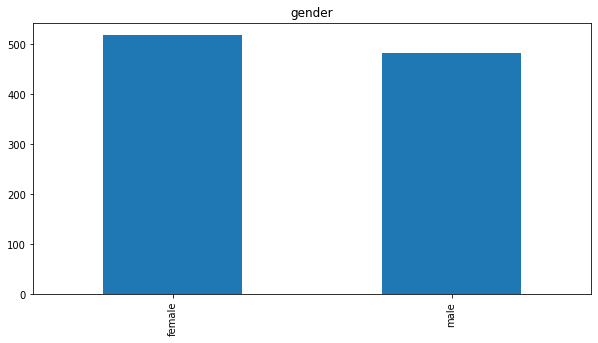

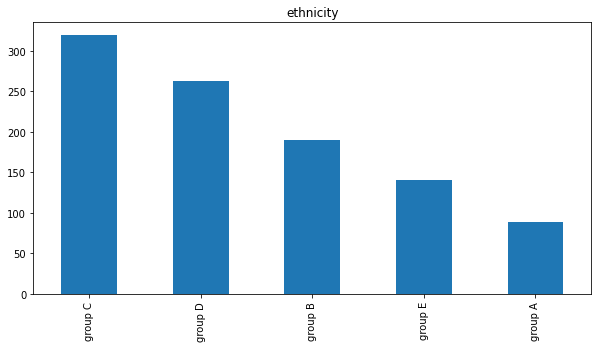

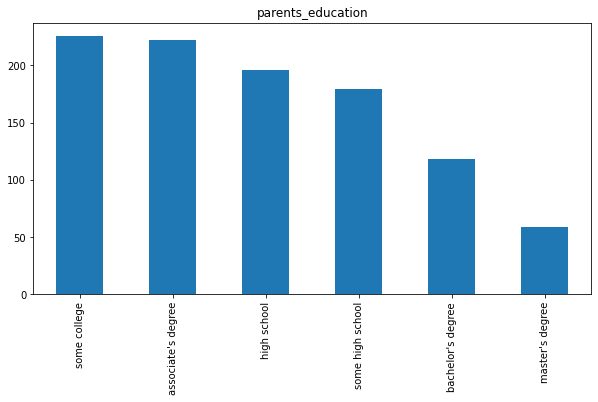

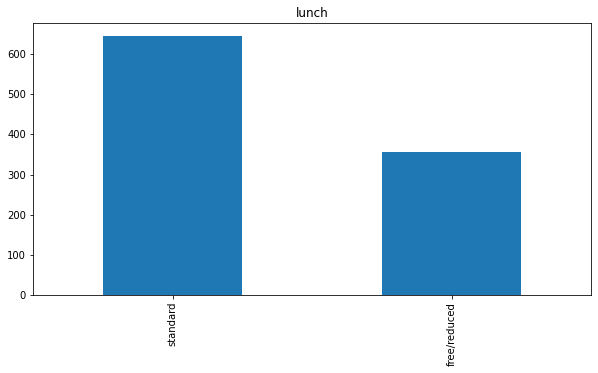

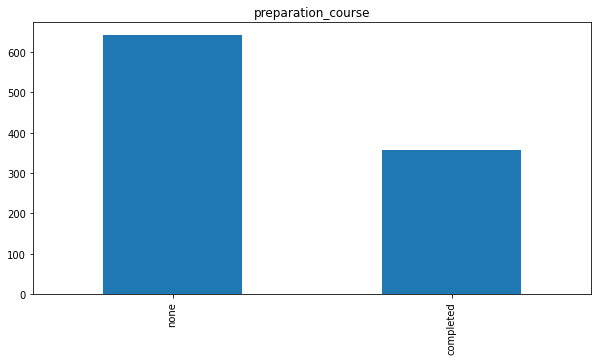

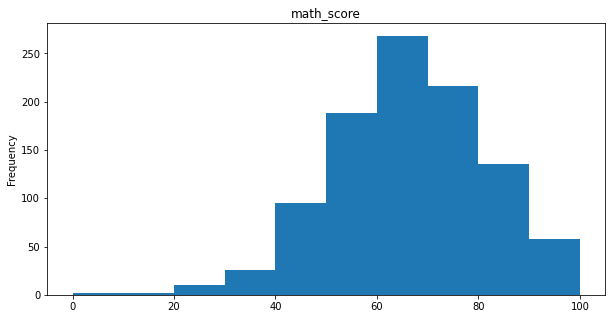

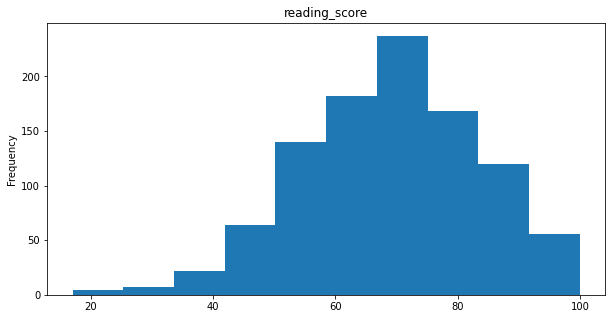

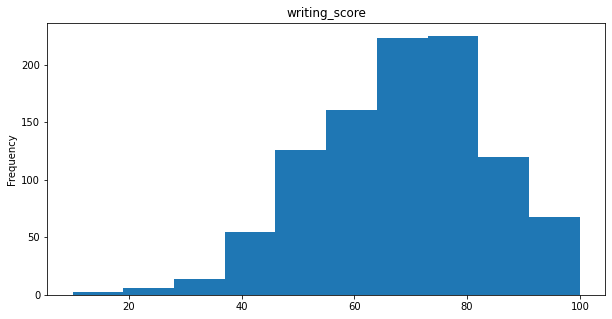

In [8]:
num_list = []
cat_list = []

for column in df:
    plt.figure(column, figsize = (10,5))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind='hist')
        num_list.append(column)
    elif is_string_dtype(df[column]):
        df[column].value_counts().plot(kind='bar')
        cat_list.append(column)

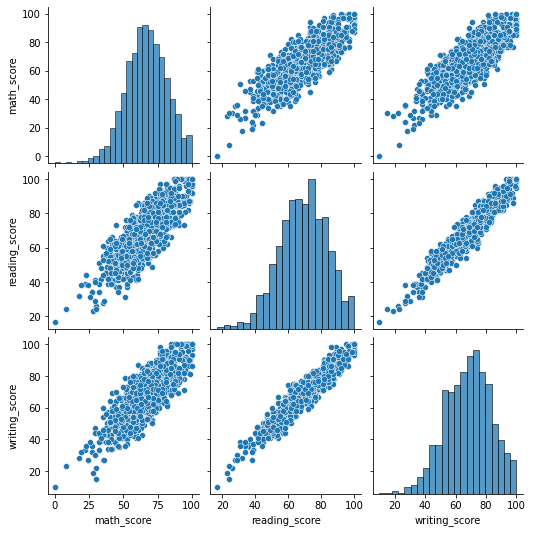

In [9]:
_ = sns.pairplot(df)

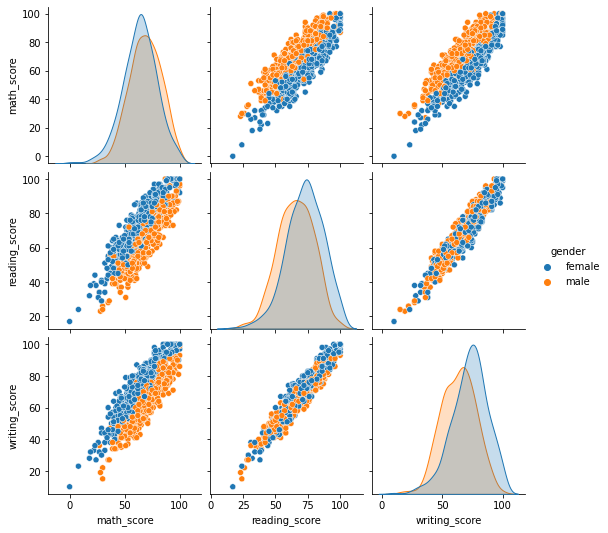

In [ ]:
for i in range(len(cat_list)):
    hue_cat = cat_list[i]
    sns.pairplot(df, hue=hue_cat)

In [ ]:
plt.figure(column, figsize = (10, 10))
correlation = df.corr()
_ = sns.heatmap(correlation, cmap="GnBu", annot=True)

In [ ]:
for i in cat_list:
    df[i] = LabelEncoder().fit_transform(df[i])

In [ ]:
features = ['gender', 'ethnicity', 'parents_education', 'lunch', 'preparation_course', 'reading_score', 'writing_score']
X = df[features]
y = df['math_score']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.75, random_state=1)

In [ ]:
def model_check(model, X_t=X_train, X_v=X_val, y_t=y_train, y_v=y_val):
    model.fit(X_t, y_t)
    print(model, ":", mean_absolute_error(y_v, model.predict(X_v)))

In [ ]:
model_rfr = RandomForestRegressor(random_state=1, max_depth=9)
model_linr = LinearRegression()
model_knn = KNeighborsRegressor(n_neighbors=15)
models = [model_rfr, model_linr, model_knn]

In [ ]:
for m in models:
    model_check(m, X_train, X_val, y_train, y_val)